In [15]:
# Import basic libraries for EDA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from dotenv import load_dotenv
import os
import pingouin as pg

In [16]:
# Import dataset
load_dotenv()
dataset_path=os.getenv("DATASET_PATH_TWO_M")
dataset = pd.read_csv(dataset_path)
dataset.head()

,Gender,Age,DIAGNOSIS,MMSE,Hip ASM,Hip Contrast,Hip Correlation,Hip Variance,Hip Sum Average,Hip Sum Variance,...,ERC CONTRAST,ERC CORRELATION,ERC VARIANCE,ERC SUM AVERAGE,ERC SUM VARIANCE,ERC ENTROPY,ERC CLUSTER SHADE,ERCs_thicknessbaseline,ERCsVolumebaseline,TOTAL_HIPPOCAMPUS_VOLUME
0,0,65.149895,0,30.0,0.460200,83.371297,0.508610,89.066304,10.318461,272.893918,...,245.139997,0.385395,209.332939,41.129640,592.191757,3.234648,18110.527190,6.948,2826.0,6861.9
1,1,67.206024,0,30.0,0.329647,149.712265,0.328176,109.824210,13.761403,289.584573,...,221.932844,0.406722,197.689209,42.149774,568.823992,3.240436,23801.869010,7.090,3792.0,7378.1
2,0,58.773440,0,30.0,0.385797,104.769354,0.545986,125.678783,15.521177,397.945779,...,283.711655,0.336695,217.002950,41.289080,584.300146,3.069283,17579.374770,6.832,2964.0,7983.5
3,0,55.096508,0,30.0,0.229011,166.953431,0.275601,112.186834,18.126786,281.793906,...,231.188679,0.498026,232.827358,33.062621,700.120751,3.093719,4888.606116,6.523,3184.0,8525.1
4,0,48.030117,0,29.0,0.242913,86.816221,0.377439,73.484651,13.463920,207.122381,...,245.120671,0.458936,233.016858,44.574015,686.946759,3.149858,22134.931110,8.253,3419.0,9320.5


## Data inspection

In [17]:
# Check for nulls
dataset.isna().sum().sort_values(ascending=False) 

ERCs_thicknessbaseline      34
Hip ASM                     27
ERC CORRELATION             25
Hip Entropy                 23
ERC CLUSTER SHADE           21
Hip Correlation             21
Hip Clusterhade             19
ERC CONTRAST                17
TOTAL_HIPPOCAMPUS_VOLUME    16
Hip Contrast                15
MMSE                        13
ERC VARIANCE                12
ERC SUM AVERAGE             11
ERCsVolumebaseline          11
ERC SUM VARIANCE            10
ERC ENTROPY                  9
Hip Sum Variance             8
Hip Variance                 7
ERC ASM                      3
Hip Sum Average              3
Age                          0
DIAGNOSIS                    0
Gender                       0
dtype: int64

In [18]:
# Show percentage of missing values per column
missing_percentage = dataset.isna().sum() / len(dataset) * 100

# Display it nicely
print(missing_percentage)

Gender                      0.000000
Age                         0.000000
DIAGNOSIS                   0.000000
MMSE                        1.023622
Hip ASM                     2.125984
Hip Contrast                1.181102
Hip Correlation             1.653543
Hip Variance                0.551181
Hip Sum Average             0.236220
Hip Sum Variance            0.629921
Hip Entropy                 1.811024
Hip Clusterhade             1.496063
ERC ASM                     0.236220
ERC CONTRAST                1.338583
ERC CORRELATION             1.968504
ERC VARIANCE                0.944882
ERC SUM AVERAGE             0.866142
ERC SUM VARIANCE            0.787402
ERC ENTROPY                 0.708661
ERC CLUSTER SHADE           1.653543
ERCs_thicknessbaseline      2.677165
ERCsVolumebaseline          0.866142
TOTAL_HIPPOCAMPUS_VOLUME    1.259843
dtype: float64


<Axes: >

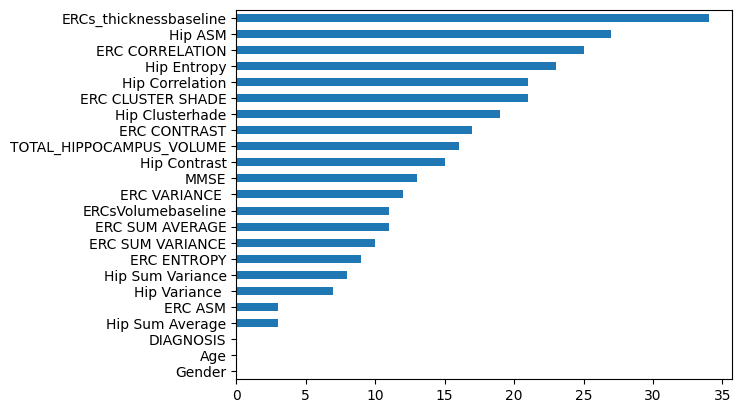

In [19]:
missing_data = dataset.isna().sum().sort_values()
missing_data.plot(kind='barh')

In [20]:
# Check for duplicated instances
dataset.duplicated().sum()

np.int64(0)

In [21]:
# Quick descriptive overview
dataset.describe(include = "all")

,Gender,Age,DIAGNOSIS,MMSE,Hip ASM,Hip Contrast,Hip Correlation,Hip Variance,Hip Sum Average,Hip Sum Variance,...,ERC CONTRAST,ERC CORRELATION,ERC VARIANCE,ERC SUM AVERAGE,ERC SUM VARIANCE,ERC ENTROPY,ERC CLUSTER SHADE,ERCs_thicknessbaseline,ERCsVolumebaseline,TOTAL_HIPPOCAMPUS_VOLUME
count,1270.000000,1270.000000,1270.000000,1257.000000,1243.000000,1255.000000,1249.000000,1263.000000,1267.000000,1262.000000,...,1253.000000,1245.000000,1258.000000,1259.000000,1260.000000,1261.000000,1249.000000,1236.000000,1259.000000,1254.000000
mean,0.456693,71.525576,0.656693,27.357200,0.292897,132.505962,0.505164,147.482042,24.380734,456.644583,...,240.738207,0.458964,224.049307,32.525927,654.772181,2.982811,4779.403047,4.974909,2603.832407,5553.716108
std,0.498317,8.818233,0.822419,3.293815,0.166056,72.826722,0.156414,49.451274,13.120373,161.128341,...,32.150938,0.075198,12.606781,5.007549,53.312162,0.224799,7670.587249,1.916339,945.366196,2136.563839
min,0.000000,45.185490,0.000000,7.000000,0.050000,28.042811,-0.597412,48.366313,7.193376,112.500000,...,163.010000,-0.070953,154.961986,21.073748,313.471204,2.172023,-4288.108246,1.930000,830.000000,1811.000000
25%,0.000000,66.277891,0.000000,26.000000,0.120000,71.997768,0.470000,107.395117,12.989166,328.626791,...,218.880167,0.427079,217.140084,29.039690,631.212500,2.849713,63.230000,2.880000,1820.500000,3428.250000
50%,0.000000,72.149240,0.000000,29.000000,0.309982,139.157235,0.548172,131.104192,16.787074,434.423985,...,237.054565,0.470000,225.405014,31.680000,664.966315,3.000000,2563.666117,5.647000,2531.000000,5886.300000
75%,1.000000,77.940780,1.000000,30.000000,0.445939,179.254418,0.590000,197.205000,37.680000,608.757500,...,257.260000,0.510000,232.406366,34.975000,690.008907,3.147544,6305.990655,6.691750,3318.000000,7461.225000
max,1.000000,95.567420,2.000000,30.000000,0.676056,765.500000,0.748333,277.306858,60.500000,775.090000,...,424.328054,0.600000,256.835283,52.663876,784.455220,3.536395,57862.318540,9.176000,5425.000000,10549.600000


In [22]:
dataset.shape

(1270, 23)

## Target analysis

Lets have a quick look at the target

In [23]:
dataset["DIAGNOSIS"].value_counts().sort_index()

DIAGNOSIS
0    722
1    262
2    286
Name: count, dtype: int64

<Axes: xlabel='DIAGNOSIS', ylabel='count'>

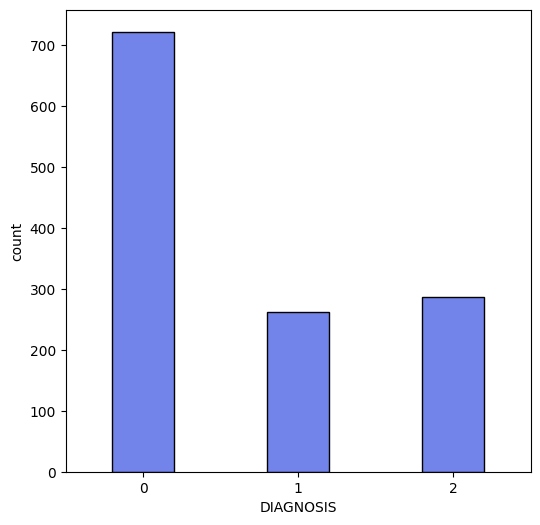

In [24]:
# Plot the target using a bar plot
plt.figure(figsize = (6,6))

sns.countplot(data = dataset, 
              x = dataset["DIAGNOSIS"].sort_index(),
              color = "#5e76fe",
              width = 0.4,
              edgecolor = "black",
)

*We can see at first glance that we have an imbalance dataset.*

**Lets have a closer look on whether our variables in the dataset do follow a normal distribution and its Skewness level.**

* We use the Shapiro-Wilk test to assess whether the data in each column follows a normal distribution. p-value: The probability that the data comes from a normal distribution. A p-value greater than 0.05 suggests the data is normal, while less than 0.05 suggests it is not normal.

* If skewness is 0, the data is perfectly symmetric. Negative skewness means the left tail is longer (data is skewed left), and positive skewness means the right tail is longer (data is skewed right).

* A kurtosis of 3 indicates a normal distribution. If kurtosis is greater than 3, it indicates heavier tails (leptokurtic), and if it's less than 3, it indicates lighter tails (platykurtic).

*In this case, scipy wouldnt allow me to work with null values, therefore, I had to drop them initially. This will be taken into consideration when performing data imputation and re-assess the dataset for completeness.*

In [25]:
from scipy.stats import shapiro
from scipy.stats import skew, kurtosis

results = {}

for column in dataset.columns:  
    stat, p = shapiro(dataset[column].dropna())
    skewness = skew(dataset[column].dropna())
    kurt = kurtosis(dataset[column].dropna())
    results[column] = {'Statistic': stat, 'p-value': p, 'Skewness': skewness, 'Kurtosis': kurt, 'Normal': p > 0.05} 

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results).T
results_df

,Statistic,p-value,Skewness,Kurtosis,Normal
Gender,0.633868,0.0,0.173882,-1.969765,False
Age,0.982507,0.0,-0.487533,0.095416,False
DIAGNOSIS,0.710762,0.0,0.707728,-1.156889,False
MMSE,0.764668,0.0,-2.095778,5.704806,False
Hip ASM,0.904876,0.0,0.010567,-1.513292,False
Hip Contrast,0.827012,0.0,2.281138,15.384929,False
Hip Correlation,0.774048,0.0,-2.565988,9.655319,False
Hip Variance,0.921186,0.0,0.347534,-1.25109,False
Hip Sum Average,0.844092,0.0,0.438354,-1.462782,False
Hip Sum Variance,0.957563,0.0,0.144228,-1.102369,False


It appears that HipsContrastbaseline and ERCsEntropybaseline do indicate a normal distribution 

How about we visuallize them for clarity? Lets use histograms

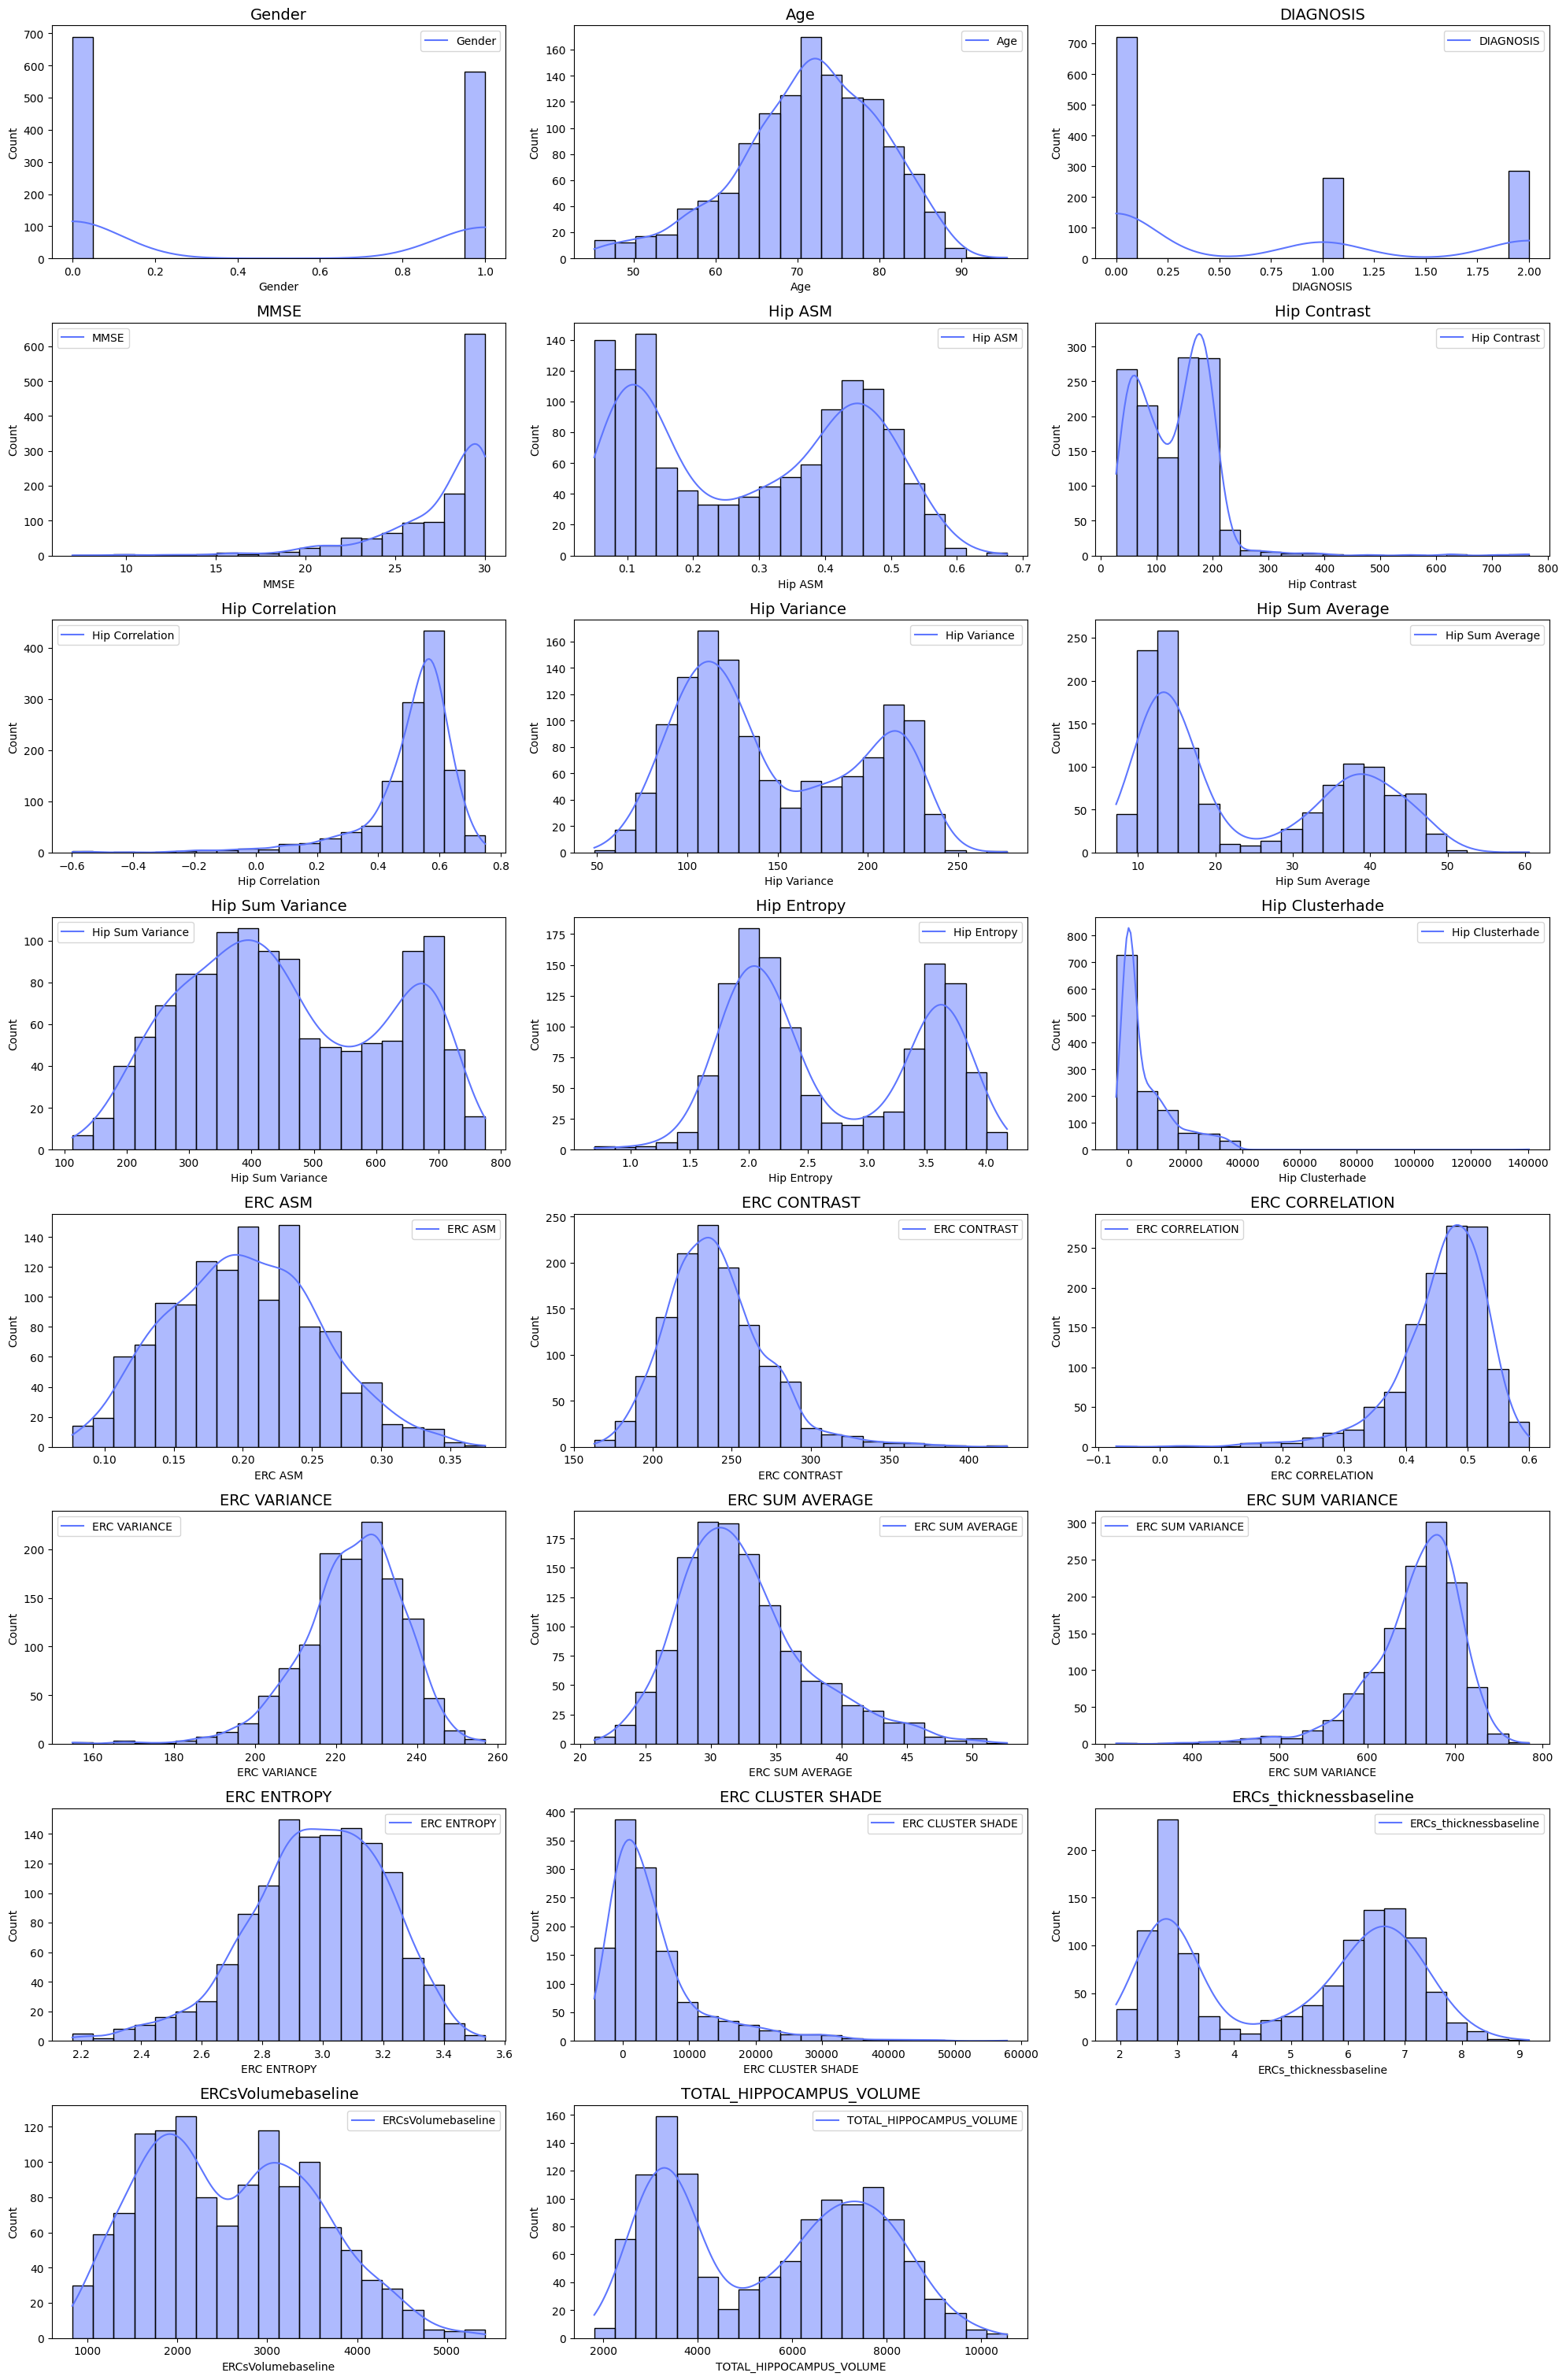

In [26]:
# Plot each column using histograms
plt.figure(figsize=(20, 45))

for i in range(len(dataset.columns)):
    plt.subplot(12, 3, i+1)
    sns.histplot(dataset[dataset.columns[i]], 
                 color="#5e76fe", 
                 kde=True,
                 edgecolor="black",
                 bins=20)
    
    plt.title(dataset.columns[i], fontsize=14)
    plt.legend([dataset.columns[i]])  

plt.tight_layout()
plt.show()

Now we want to check for any outliers. How about we use boxplots?

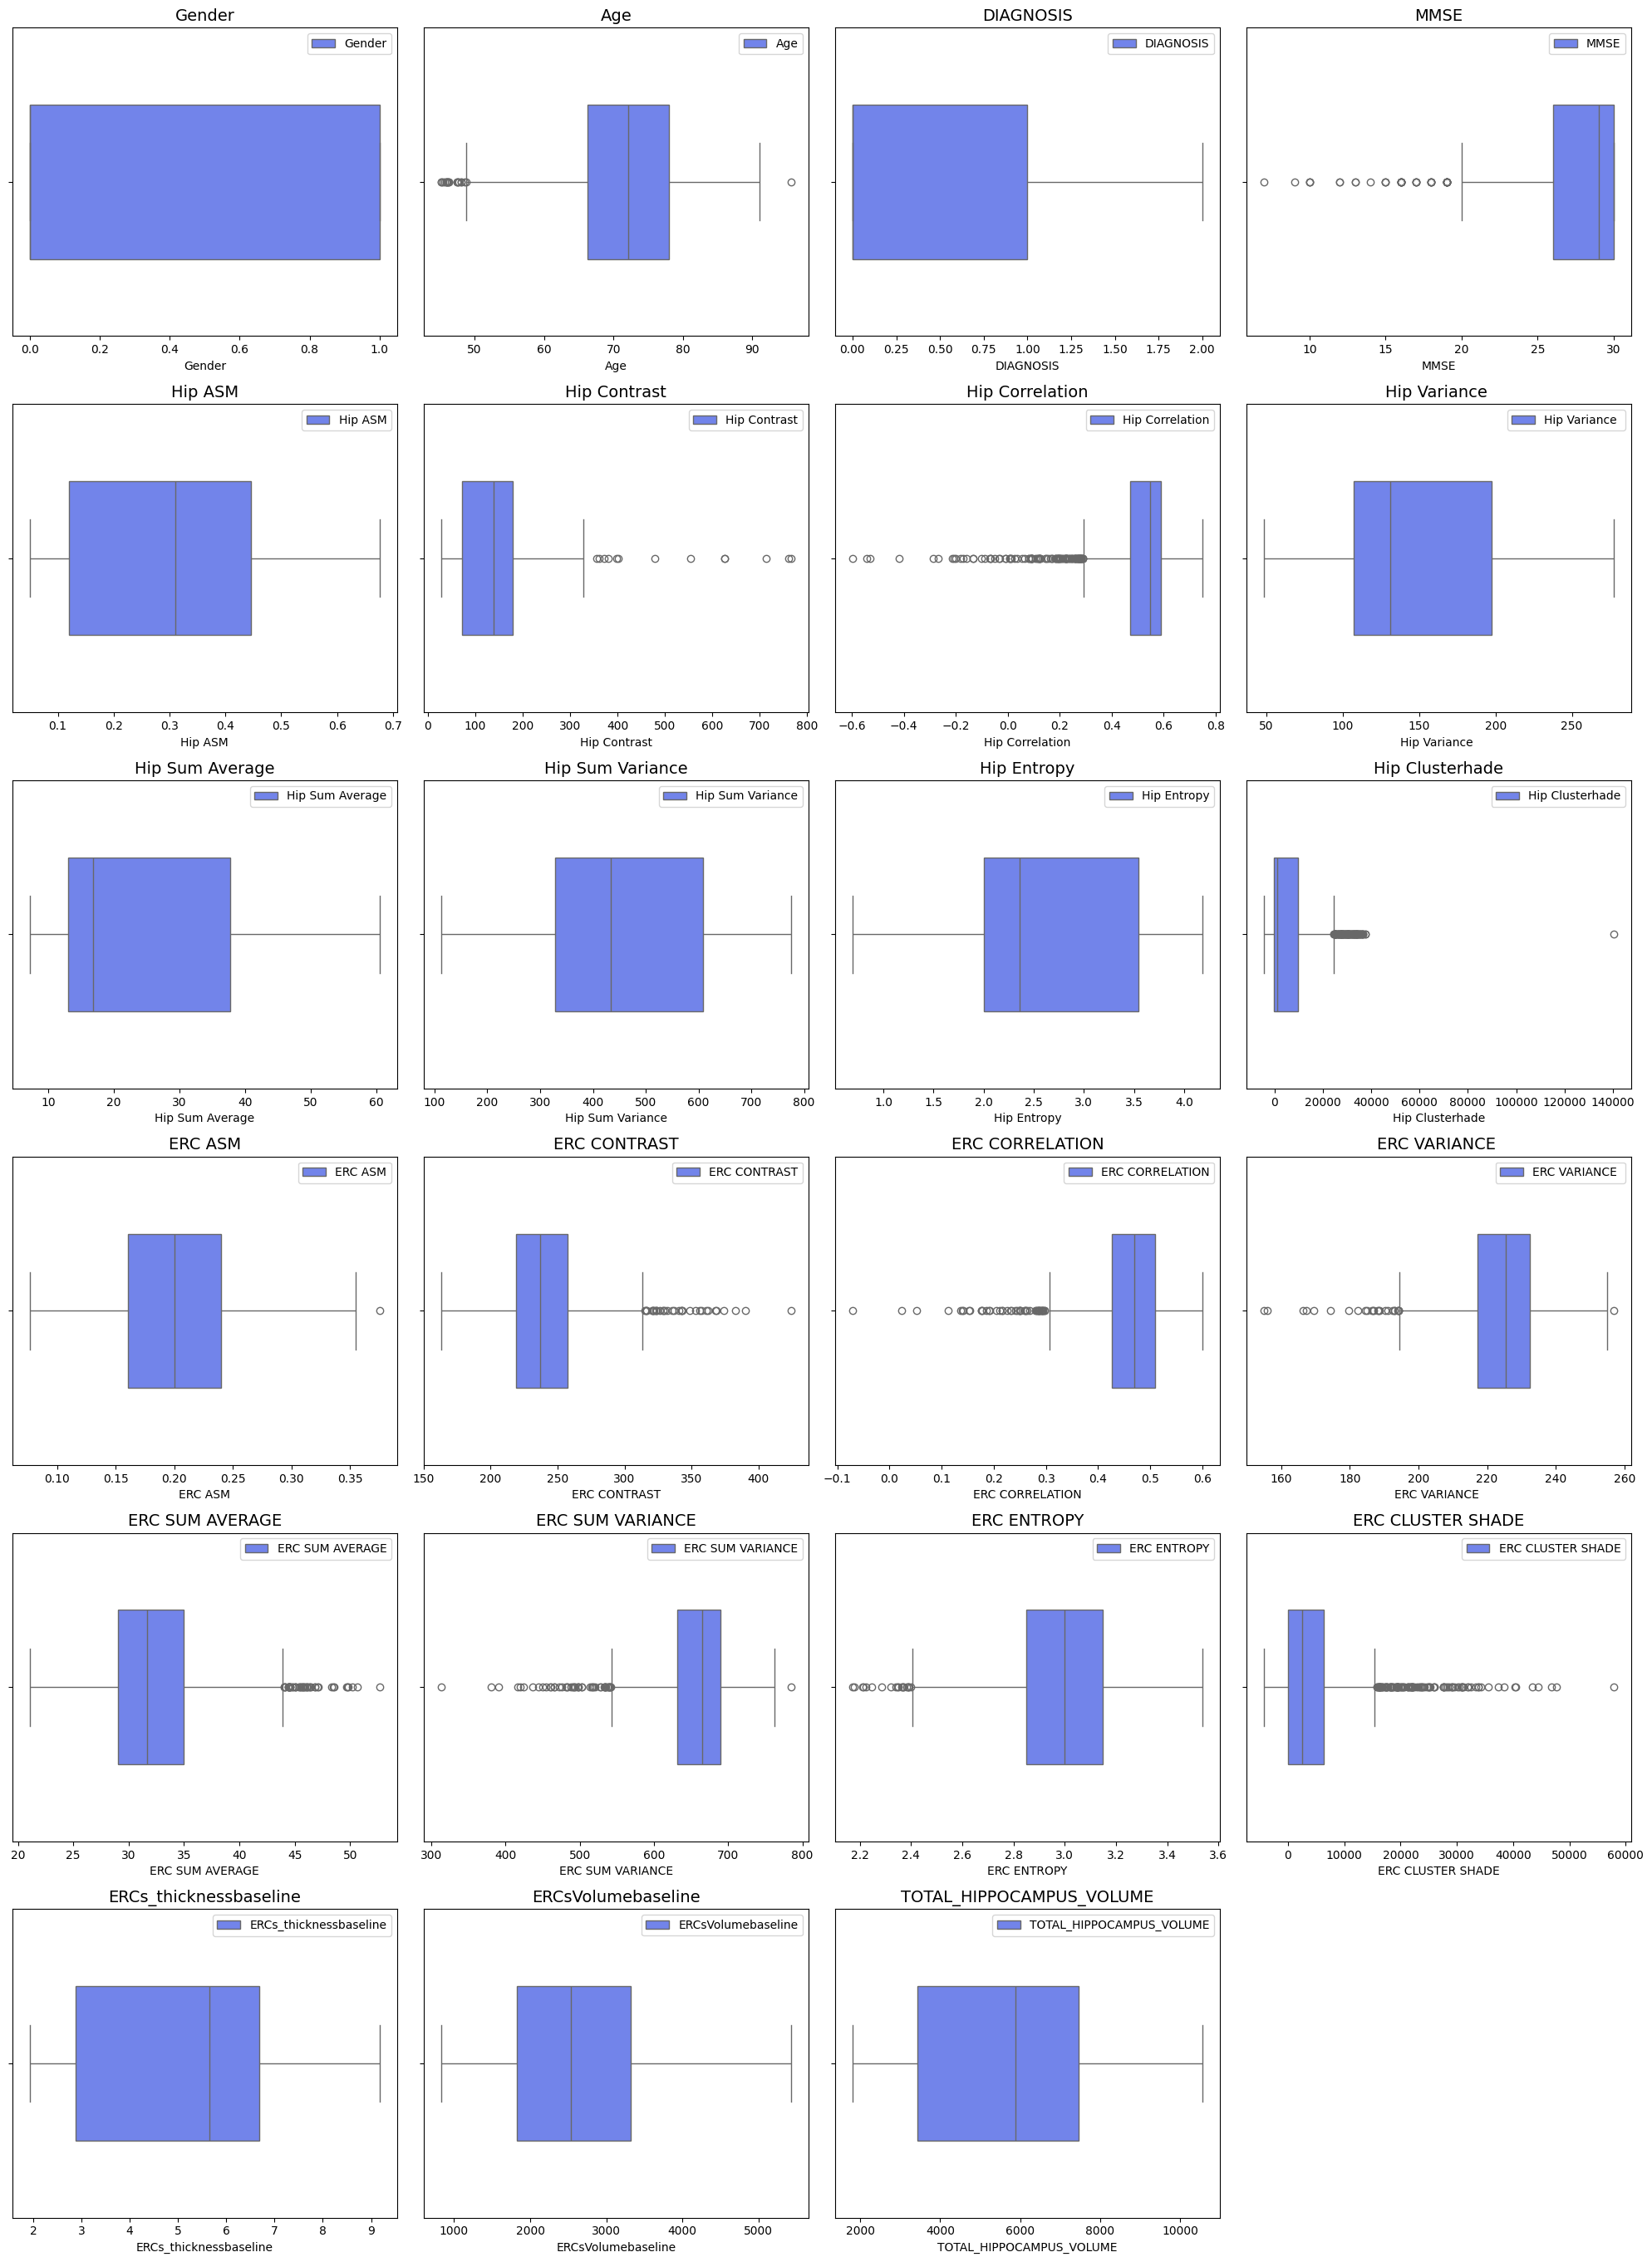

In [27]:
# Plot each column using boxplots
plt.figure(figsize=(20, 45))

for i in range(len(dataset.columns)):
    plt.subplot(10, 4, i+1)
    sns.boxplot(x=dataset[dataset.columns[i]],  # use x= for boxplot
                color="#5e76fe",
                width=0.5)
    
    plt.title(dataset.columns[i], fontsize=14)
    plt.legend([dataset.columns[i]])  # Add legend with the column name

plt.tight_layout()
plt.show()

We can now better understand the spread of our dataset and detect a few outliers from here. 

How about we check the Q-Q plot for each variable? Perhaps we can have a much better comprehension if the data follows a normal distribution aside from relying on the above histogram.

Note: *Q-Q plots rely on the complete dataset to compute quantiles. Therefore, i had to drop a few values to see the red line*

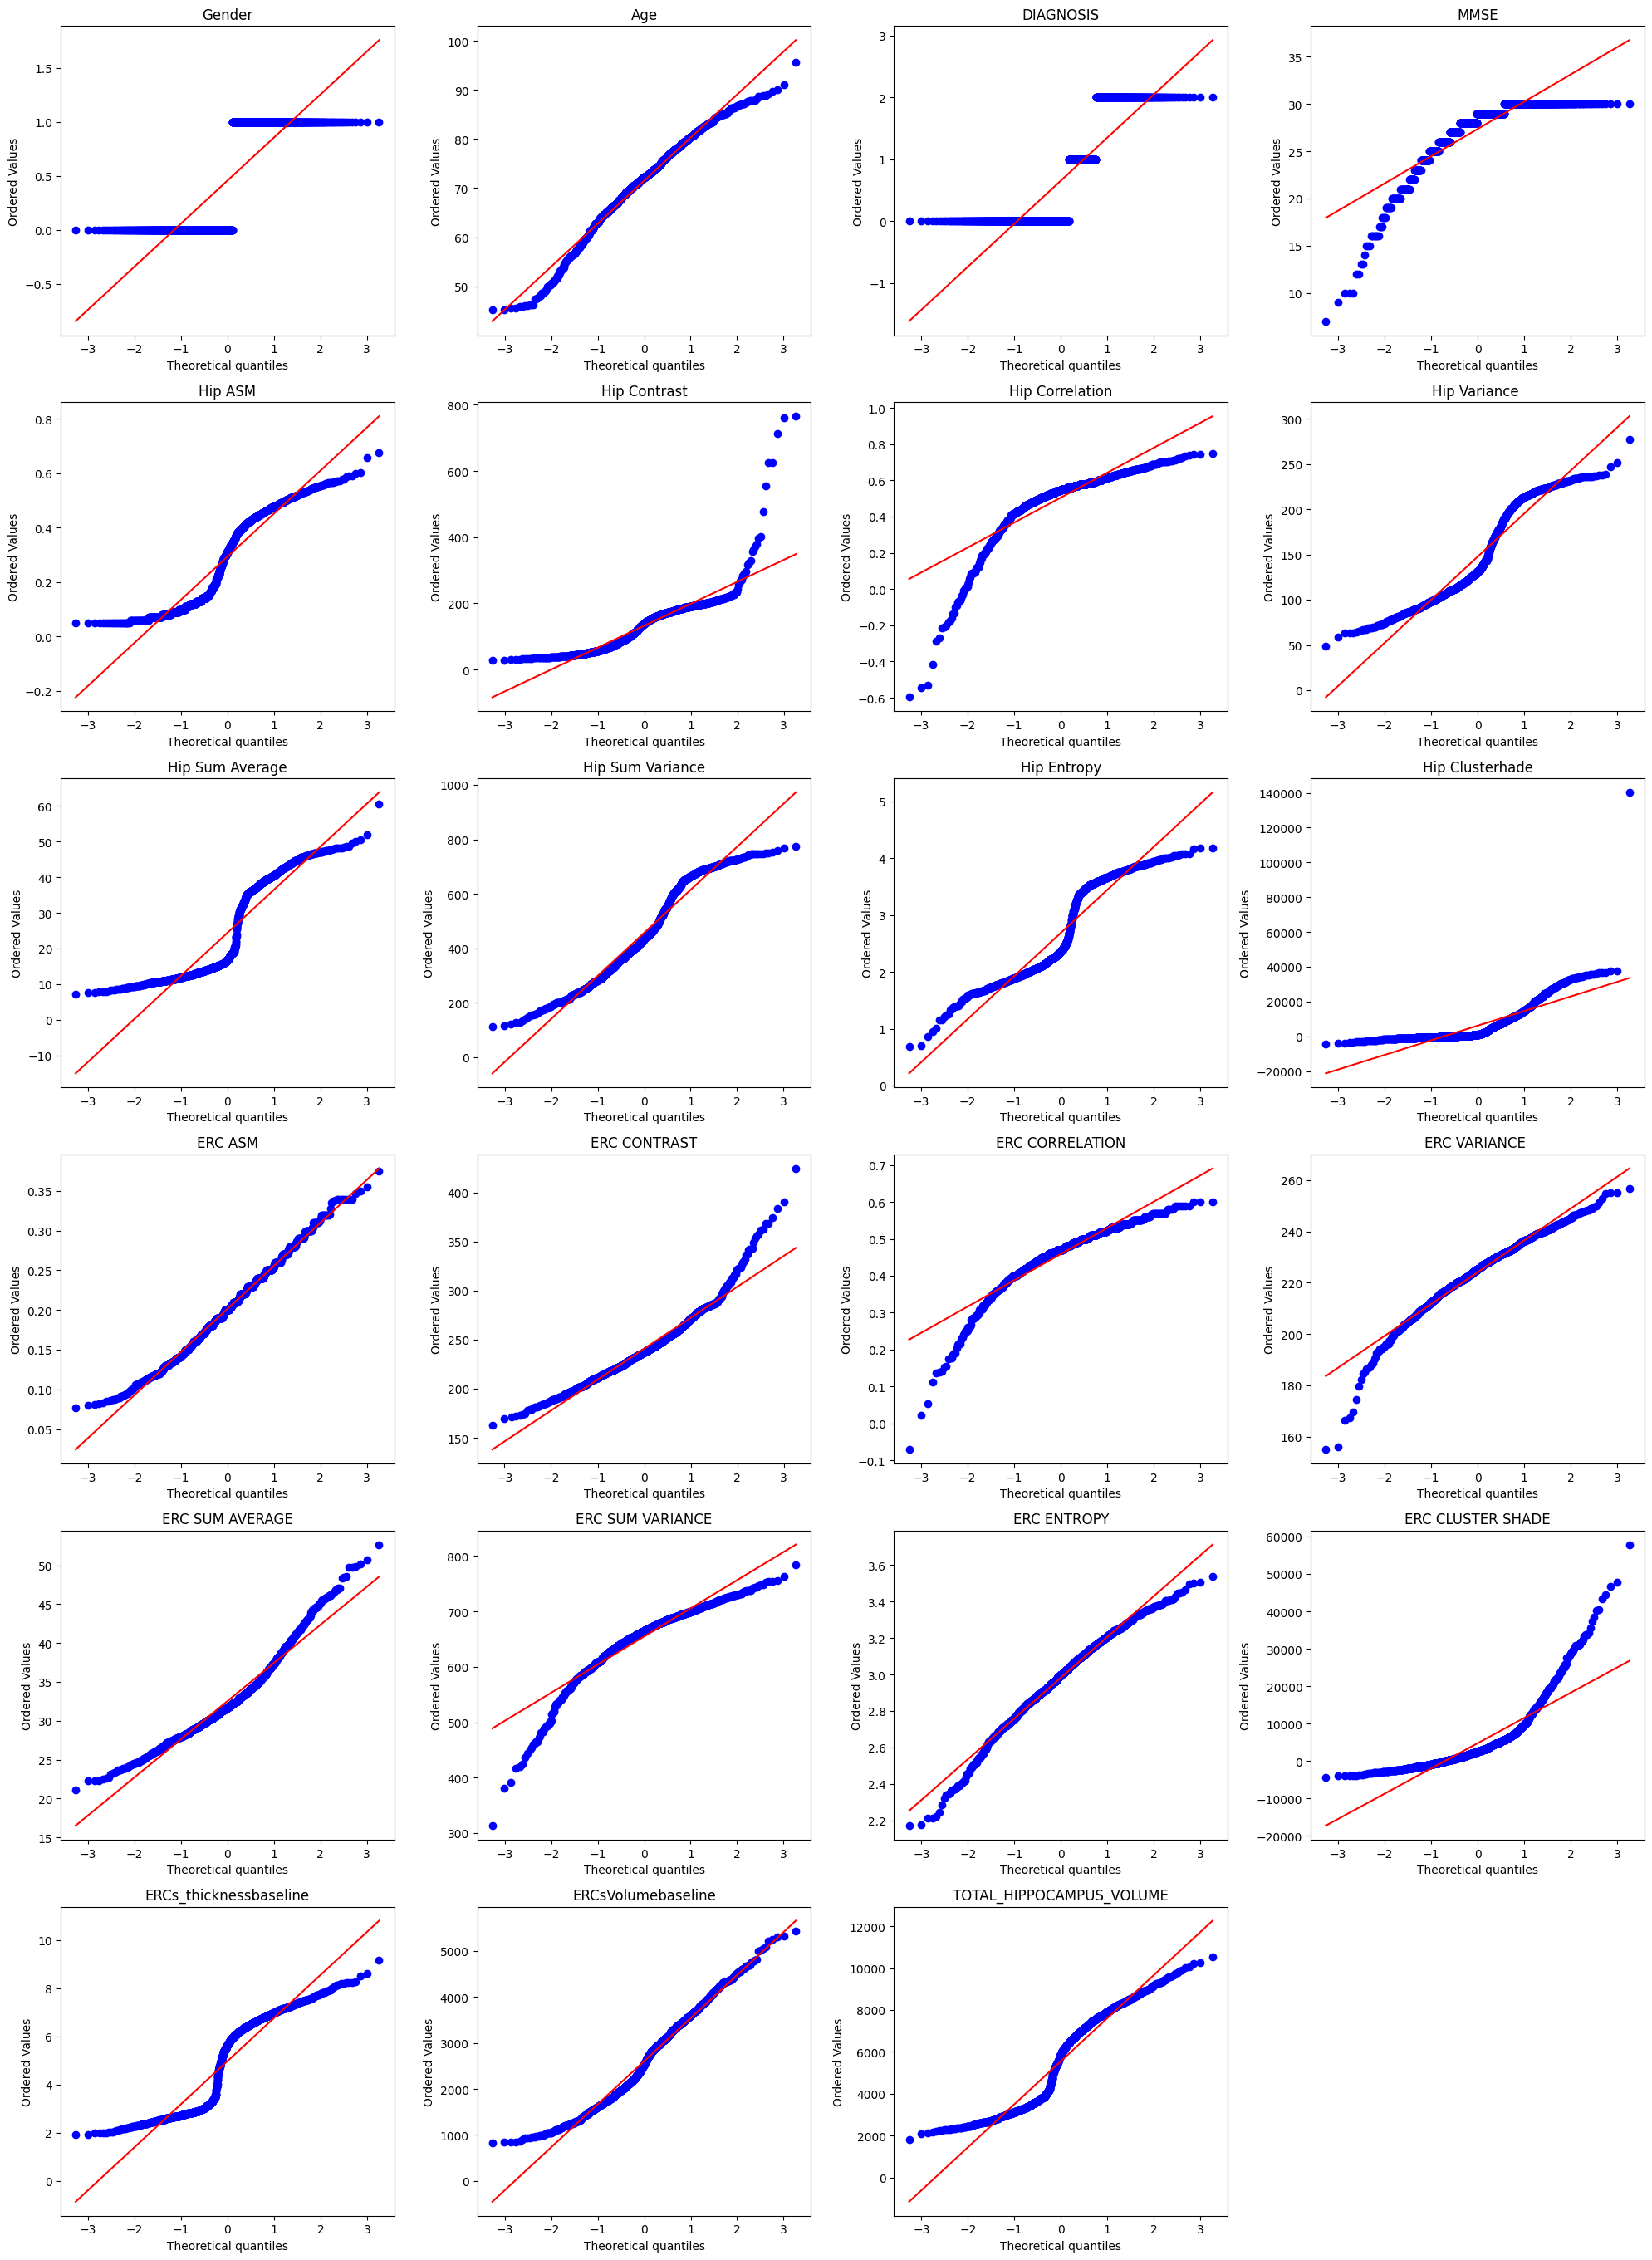

In [28]:
# Plot Q-Q plots for each column
plt.figure(figsize=(20, 45))

for i in range(len(dataset.columns)):
    plt.subplot(10, 4, i + 1)
    stats.probplot(dataset[dataset.columns[i]].dropna(), 
                   dist='norm', plot=plt)
    plt.title(dataset.columns[i])

plt.tight_layout()

 Interesing, perhaps the distribution may change if we perform data imputation? If thats the case, then we may need to perform data transformation.